# Prova d'esame del 29/01/2020

In [6]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\utente\AppData\Local\Temp\ipykernel_10200\1725004204.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [8]:
df = pd.read_csv("seeds_dataset.txt",sep="\t", header=None)
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [9]:
X = df.drop(7,axis =1)
y = df[7]
print(" X has a shape of:",X.shape,",y has a shape of: ",y.shape)

 X has a shape of: (210, 7) ,y has a shape of:  (210,)


In [10]:
sns.pairplot(X)

ValueError: 'seeds_dataset.txt' is not one of the example datasets.

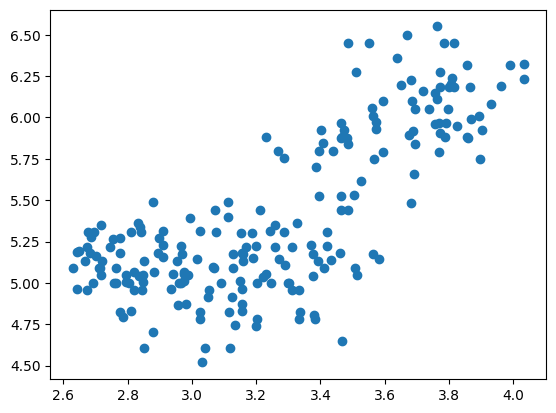

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[4],X[6])

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
random_state =42
n_clusters = range(2,10)
silouette_score = []
inertia = []
for i in n_clusters:
    kmeans = KMeans(n_clusters=i,random_state=random_state)
    pred_data= kmeans.fit_predict(X)
    silouette_score.append(silhouette_score(X,pred_data))
    inertia.append(kmeans.inertia_)


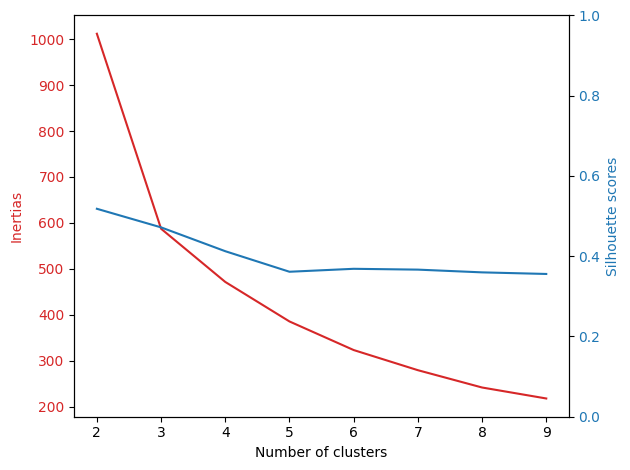

In [ ]:
def two_plots(x, y1, y2, xlabel, y1label, y2label):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(y1label, color=color)
    ax1.plot(x, y1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(y2label, color=color)  # we already handled the x-label with ax1
    ax2.plot(x, y2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
two_plots(x=n_clusters, y1=inertia, y2=silouette_score
          , xlabel='Number of clusters', y1label='Inertias', y2label='Silhouette scores'
         )

In [ ]:
k = 3
km_best = KMeans(n_clusters=k, random_state=random_state)
y_pred = km_best.fit_predict(X)



In [ ]:
from sklearn.metrics import confusion_matrix
print("The confusion matrix is:")
from max_diag import max_diag
print(max_diag(confusion_matrix(y,y_pred)))

The confusion matrix is:
[[60.  1.  9.]
 [10. 60.  0.]
 [ 2.  0. 68.]]


In [ ]:

confusion_matrix_ = max_diag(confusion_matrix(y,y_pred))
accuracy = np.sum(np.diag(confusion_matrix_))/len(y)
print("The accuracy is ", accuracy)

The accuracy is  0.8952380952380953


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_mms = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_mms.head()

,0,1,2,3,4,5,6
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994


In [ ]:
k = 3
kn = KMeans(n_clusters=k,random_state=random_state)
y_pred = kn.fit_predict(X_mms)
confusion_matrix_ = max_diag(confusion_matrix(y,y_pred))
print(confusion_matrix_)
accuracy = np.sum(np.diag(confusion_matrix_))/len(y)
print("The accuracy is ", accuracy)

[[58.  2. 10.]
 [ 8. 62.  0.]
 [ 3.  0. 67.]]
The accuracy is  0.8904761904761904
